In [1]:
import numpy as np
from numpy.typing import ArrayLike


class LinearRegressionNormalEquation:
    _beta = None

    @staticmethod
    def _calculate_beta(X: ArrayLike, y: ArrayLike) -> ArrayLike:
        X_temp = X if len(X.shape) > 1 else X.reshape((-1, 1))
        X_ones = np.insert(X_temp, 0, 1, axis=1)
        return np.matmul(
            np.matmul(
                np.linalg.inv(
                    np.matmul(X_ones.T, X_ones)),
                X_ones.T),
            y)

    def fit(self, X: ArrayLike, y: ArrayLike) -> None:
        self._beta = self._calculate_beta(X, y)

    def predict(self, X: ArrayLike) -> ArrayLike:
        if self._beta is None:
            raise RuntimeError("The model is not fitted.")
        return LinearRegressionNormalEquation._calculate_targets(X, self._beta)

    @staticmethod
    def _calculate_targets(X: ArrayLike, beta: ArrayLike) -> ArrayLike:
        X_temp = X if len(X.shape) > 1 else X.reshape((-1, 1))
        X_ones = np.insert(X_temp, 0, 1, axis=1)
        return np.matmul(X_ones, beta)

In [29]:
import pandas as pd
import numpy as np
train = pd.read_csv("quasar_train.csv", header=None)
test = pd.read_csv("quasar_test.csv", header=None)
train

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
0,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
1,0.629,1.910,0.976,2.161,0.964,2.068,1.630,1.716,2.378,-0.540,...,0.532,1.462,0.323,2.515,1.194,0.654,1.056,1.450,0.203,0.382
2,-0.161,1.830,0.609,1.932,0.932,0.857,0.978,1.032,1.793,1.455,...,0.961,1.407,1.296,0.943,1.055,2.265,1.053,1.439,0.767,-0.552
3,-0.085,-1.304,0.691,-0.800,-1.090,1.087,0.734,1.198,1.122,0.742,...,0.447,1.139,0.422,1.248,1.047,0.500,1.514,1.623,1.202,0.924
4,1.283,-0.487,0.660,0.167,-1.217,1.535,2.264,0.220,0.865,-0.723,...,0.714,1.173,1.579,0.477,0.781,0.525,2.466,1.493,1.503,0.698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.541,1.128,0.309,1.549,2.142,0.573,0.861,-0.064,0.946,0.827,...,2.455,0.949,1.463,0.870,1.053,1.211,1.230,0.865,0.792,0.635
197,1.237,0.712,1.407,1.155,-0.538,-1.360,2.321,1.598,1.449,1.684,...,1.029,1.205,1.121,1.341,1.769,0.701,0.635,0.723,0.622,0.348
198,0.212,0.102,0.452,2.887,3.236,0.674,-1.290,0.954,0.795,0.976,...,1.053,1.517,1.491,1.546,0.777,0.469,1.949,1.018,0.671,0.538
199,0.193,1.063,0.292,0.699,-1.152,1.738,1.987,1.434,3.078,0.784,...,0.907,1.004,0.427,1.216,1.216,1.962,1.421,0.612,0.847,1.000


In [4]:
X = np.array(train.iloc[0, :])
y = np.array(train.iloc[1, :])

In [5]:
from linear_regression_normal_equation import LinearRegressionNormalEquation
lr = LinearRegressionNormalEquation()
lr.fit(X, y)

In [6]:
lr._beta

array([ 2.51339906e+00, -9.81122145e-04])

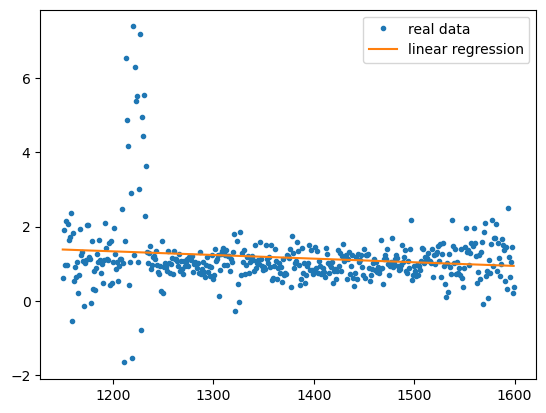

In [9]:
import matplotlib.pyplot as plt
plt.plot(X, y, '.', label="real data")
plt.plot(X, lr.predict(X), label="linear regression")
plt.legend()
plt.show()

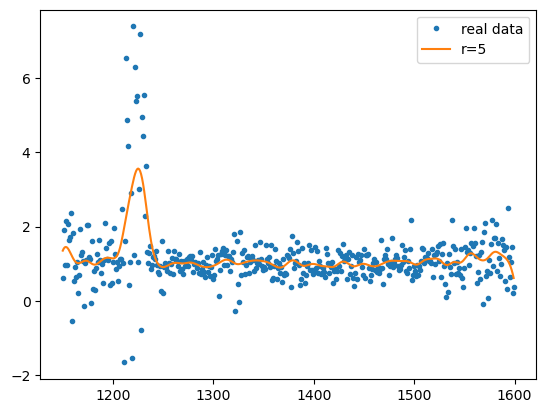

In [11]:
from locally_weighted_linear_regression_normal_equation import LocallyWeightedLinearRegressionNormalEquation

wlr = LocallyWeightedLinearRegressionNormalEquation()

def weight_expression(r):
    return lambda x_single, X: np.exp(- (np.square(x_single - X)/(2 * np.square(r))))

import matplotlib.pyplot as plt
plt.plot(X, y, '.', label="real data")
wlr.fit(X, y, weight_expression(5))
plt.plot(X, wlr.predict(X), label="r=5")
plt.legend()
plt.show()

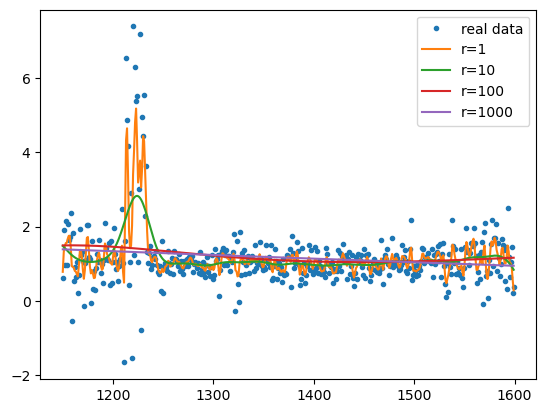

In [13]:
plt.plot(X, y, '.', label="real data")

for r in [1, 10, 100, 1000]:
    wlr.fit(X, y, weight_expression(r))
    plt.plot(X, wlr.predict(X), label="r="+str(r))
    plt.legend()
plt.show()

# Smooth data

In [37]:
X = np.array(train.iloc[0, :])

result = [X]
for row in range(1, 201):
    y = np.array(train.iloc[row, :])
    wlr.fit(X, y, weight_expression(5))
    prediction = wlr.predict(X)
    result += [prediction]
    
pd.DataFrame(result).to_csv("quasar_train_smoothed.csv", index=False, header=False)

In [35]:
X = np.array(test.iloc[0, :])

result = [X]
for row in range(1, 51):
    y = np.array(test.iloc[row, :])
    wlr.fit(X, y, weight_expression(5))
    prediction = wlr.predict(X)
    result += [prediction]

pd.DataFrame(result).to_csv("quasar_test_smoothed.csv", index=False, header=False)

## TODO:
1. Distance between two spectra
2. KNN of spectra
3. Load smoothed data from files